In [115]:
import re
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from collections import Counter
%matplotlib inline

# Первой задание

In [165]:
with open('sentences.txt', 'r') as file:
    sentences = file.readlines()
    
tokens = [[el for el in re.split('[^a-z]', x.strip().lower()) if el != ''] for x in sentences]

#counter = Counter([t for x in tokens for t in x])
all_words = list(set([t for x in tokens for t in x]))

words = np.zeros((len(tokens), len(all_words)))

for i in range(words.shape[0]):
    for j in range(words.shape[1]):
        words[i, j] = tokens[i].count(all_words[j])

values = list()   

for w in words:
    values.append(cosine(words[0], w))
    
values = np.array(values)

min1 = 99
min2 = 98
ans = [99, 99]
print(values)

for i, j in enumerate(values):
    if i == 0:
        continue
    if j < min1:
        ans[1] = ans[0]
        ans[0] = i
        min2 = min1
        min1 = j
        continue
    if j < min2:
        ans[1] = i
        min2 = j
print(ans)
print(np.array(tokens)[ans])

[0.         0.95275444 0.86447381 0.89517152 0.77708871 0.94023857
 0.73273876 0.92587507 0.88427249 0.90550888 0.83281654 0.88047714
 0.83964325 0.87035926 0.87401184 0.94427218 0.84063619 0.9566445
 0.94427218 0.88854436 0.84275727 0.82503645]
[6, 4]
[list(['domestic', 'cats', 'are', 'similar', 'in', 'size', 'to', 'the', 'other', 'members', 'of', 'the', 'genus', 'felis', 'typically', 'weighing', 'between', 'and', 'kg', 'and', 'lb'])
 list(['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin'])]


# Второе задание

In [109]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

[3.25221687 0.63522142]


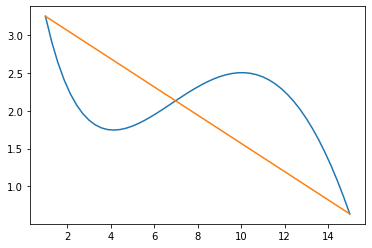

In [134]:
A = np.array([[1, 1], [1, 15]])
Y = f(A[:, 1])

X = sc.linalg.solve(A, Y)

n = np.linspace(1, 15)
plt.plot(n, f(n))
plt.plot(n, X[0] + X[1] * n)

[ 4.86048112 -3.08280755  1.4745433 ]


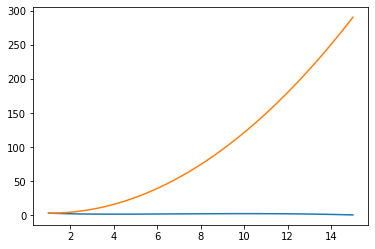

In [132]:
A = np.array([[1, 1, 1], [1, 8, 15], [1, 64, 225]])
Y = f(A[:, 1])

X = sc.linalg.solve(A, Y)
print(X)

n = np.linspace(1, 15)
plt.plot(n, f(n))
plt.plot(n, X[0] + X[1] * n + X[2] * (n**2))

[[   1    1    1    1]
 [   1    4   16   64]
 [   1   10  100 1000]
 [   1   15  225 3375]]
4.362641535118072
[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


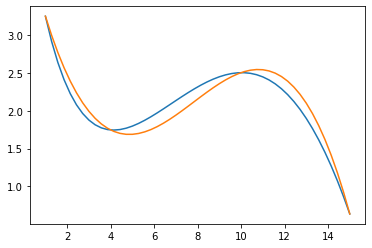

In [163]:
A = np.array([[1, 1, 1, 1], [1, 4, 10, 15], [1, 4**2, 10**2, 15**2], [1, 4**3, 10**3, 15**3]])
A = A.T
Y = f(A[:, 1])
print(A)
X = sc.linalg.solve(A, Y)

n = np.linspace(1, 15)
print(X[0])
plt.plot(n, f(n))
plt.plot(n, X[0] + X[1] * n + X[2] * (n**2) + X[3]*(n**3))

print(X)